<img src="https://github.com/djp840/MSDS_432_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS432 - Assignment 06 - Implement a Breadth-first Search Algorithm

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import deque
%matplotlib inline

### Mount Google Drive to Colab Environment

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Search Function

In [2]:
def search(name, find):
    search_queue = deque()
    search_queue += graph[name]
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person == find:
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False

### Create Graph with 5 levels and no reverse connections

In [3]:
graph = { "Isaac" : ["Steve","John"],
          "Steve" : ["Isaac", "Rachel"],
          "John" : ["Isaac", "Rachel"],
          "Rachel" : ["Lauren"],
          "Lauren" : []
         }

### Search for 1

In [4]:
search1 = []

for i in range(1000):
    start = time.clock()
    search('Isaac', 'Isaac')
    end = time.clock()
    search1.append((end - start) * 1000)
    
search1_time = np.mean(search1)

### Search for 2

In [5]:
search2 = []

for i in range(1000):
    start = time.clock()
    search('Isaac', 'Steve')
    search('Isaac', 'John')
    end = time.clock()
    search2.append((end - start) * 1000)
    
search2_time = np.mean(search2)

### Search for 3

In [6]:
search3 = []

for i in range(1000):
    start = time.clock()
    search('Isaac', 'John')
    search('Isaac', 'Isaac')
    search('Isaac', 'Rachel')
    end = time.clock()
    search3.append((end - start) * 1000)
    
search3_time = np.mean(search3)

### Search for 4

In [7]:
search4 = []

for i in range(1000):
    start = time.clock()
    search('Isaac', 'John')
    search('Isaac', 'Isaac')
    search('Isaac', 'Rachel')
    search('Isaac', 'Lauren')
    end = time.clock()
    search4.append((end - start) * 1000)
    
search4_time = np.mean(search4)

### Search 5

In [8]:
search5 = []

for i in range(1000):
    start = time.clock()
    search('Isaac', 'John')
    search('Isaac', 'Isaac')
    search('Isaac', 'Rachel')
    search('Isaac', 'Lauren')
    search('Isaac', 'Steve')
    end = time.clock()
    search5.append((end - start) * 1000)
    
search5_time = np.mean(search5)

### Create DataFrame with results

In [9]:
names = ['Isaac', 'Steve, John', 'John, Isaac, Rachel', 'John, Isaac, Rachel, Lauren',
        'John, Isaac, Rachel, Lauren, Steve']

levels = ['First', 'Second', 'Third', 'Fourth', 'Fifth']

times = [search1_time, search2_time, search3_time, search4_time, search5_time]
df = pd.DataFrame(list(zip(levels, names, times)),
              columns=['Level', 'Names Searched', 'Execution Time'])
df.round(3)

,Level,Names Searched,Execution Time
0,First,Isaac,0.008
1,Second,"Steve, John",0.006
2,Third,"John, Isaac, Rachel",0.011
3,Fourth,"John, Isaac, Rachel, Lauren",0.011
4,Fifth,"John, Isaac, Rachel, Lauren, Steve",0.013


### Plot Execution Times

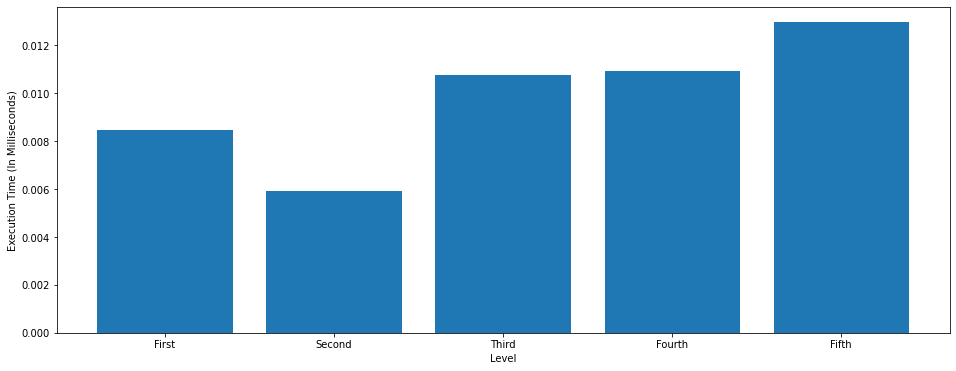

In [10]:
y_pos = np.arange(len(names))
plt.figure(figsize=(16, 6))
plt.bar(y_pos, times)
plt.xticks(y_pos, levels)
plt.xlabel('Level')
plt.ylabel('Execution Time (In Milliseconds)')
plt.show()